# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

The data has 41188 examples of phone contacts made to customers from May 2008 to November 2010 by a Portugese bank. Often there were multiple phone calls made to the same customer. The dependent variable shows whether the campaing was successful or not (i.e. whether the customer subscribed to the bank's product or not)

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from time import process_time

from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.inspection import permutation_importance

from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, precision_recall_curve, roc_curve
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn import set_config
set_config(display="diagram")

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Business Objective

The objective is to predict how successful a future marketing campaign will be for the Portugese bank given these set of factors. The goal for the bank is to have more of these phone calls transalte into customers subscribing to their product.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [5]:
#Select first seven columns and the y column - Smaller data to work with for performance 
df1 = df.iloc[:,[0,1,2,3,4,5,6,-1]]

In [6]:
#Replace "unknown" with nan
df1 = df1.replace("unknown", np.nan)

In [7]:
#Check for na values - there are missing values
df1.isna().sum()

age             0
job           330
marital        80
education    1731
default      8597
housing       990
loan          990
y               0
dtype: int64

In [8]:
#Replace missing age with mean - not needed as all values populated
#df1['age'].fillna((df1['age'].mean()), inplace=True)

#Replace all other missing values with most frequent values
df1 = df1.fillna(df1.mode().iloc[0])

In [9]:
#Alternate to imputing is to drop all rows with missing values - We lose about (~10,000) 25% of the data
#df1.dropna(inplace= True)

In [10]:
#Replace yes/no with 1/0
df1['y'] = df1['y'].replace(['yes','no'], [1,0])
df1['default'] = df1['default'].replace(['yes','no'], [1,0])
df1['housing'] = df1['housing'].replace(['yes','no'], [1,0])
df1['loan'] = df1['loan'].replace(['yes','no'], [1,0])

### Correlation of numeric variables

In [11]:
df1.corr()

,age,default,housing,loan,y
age,1.000000,0.001891,-0.001755,-0.007198,0.030399
default,0.001891,1.000000,-0.003679,-0.003609,-0.003041
housing,-0.001755,-0.003679,1.000000,0.036425,0.011085
loan,-0.007198,-0.003609,0.036425,1.000000,-0.004466
y,0.030399,-0.003041,0.011085,-0.004466,1.000000


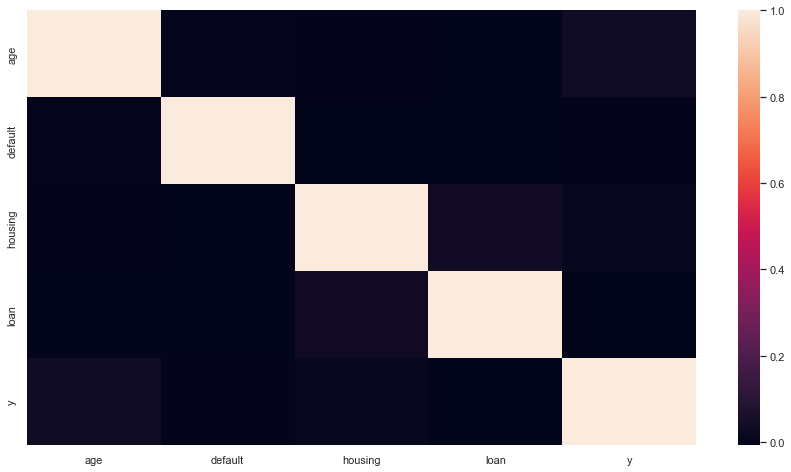

In [12]:
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.heatmap(df1.corr())

### Check to see if data is imbalanced

In [13]:
df1.y.value_counts(normalize= True)

0    0.887346
1    0.112654
Name: y, dtype: float64

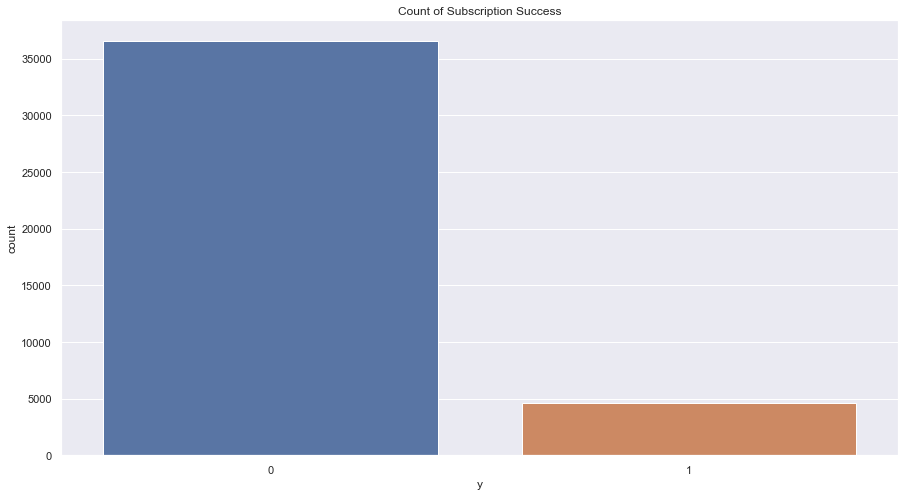

In [14]:
ax = sns.countplot(x="y", data=df1).set(title = 'Count of Subscription Success')

### Encode and Transform Data

To be used in the pipeline below for the models

In [15]:
#Create transformer - use standard scaling
transformer = make_column_transformer((OneHotEncoder(drop = 'if_binary'), ['job','marital','education']),
                                     remainder = StandardScaler())

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [16]:
X = df1.iloc[:,:7]

In [17]:
y = df1.y

In [18]:
#split to train and test - use stratify=y as data is imbalanced
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = .3, random_state = 42, stratify = y)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

We run dummy classifier on the entire data (X and y). 
The input feature values are ignored so encoding/trasnfromation is not necessary.

In [19]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X, y)

DummyClassifier(strategy='most_frequent')

In [20]:
dummy_clf.predict(X)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [21]:
dummy_clf.score(X,y)

0.8873458288821987

Our model needs to beat this benchmark score.

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

### Logistic Regression

In [22]:
lr_start = process_time()
lr_pipe = Pipeline([('transform', transformer), ('lr', LogisticRegression())])
lr_pipe.fit(X_train, y_train)
lr_stop = process_time()
lr_pipe

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['job', 'marital',
                                                   'education'])])),
                ('lr', LogisticRegression())])

### Problem 9: Score the Model

What is the accuracy of your model?

In [23]:
lr_train_acc = lr_pipe.score(X_train, y_train)
lr_test_acc = lr_pipe.score(X_test, y_test)
lr_predictions = lr_pipe.predict(X_test)
lr_time = lr_stop-lr_start

### Results
print(classification_report(lr_predictions, y_test))

print(f'Training Accuracy : {lr_train_acc: .2f}')
print(f'Test Accuracy     : {lr_test_acc: .8f}')
print(f'Train Time        : {lr_time}')

              precision    recall  f1-score   support

           0       1.00      0.89      0.94     12357
           1       0.00      0.00      0.00         0

    accuracy                           0.89     12357
   macro avg       0.50      0.44      0.47     12357
weighted avg       1.00      0.89      0.94     12357

Training Accuracy :  0.89
Test Accuracy     :  0.88735130
Train Time        : 0.4375


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

### KNN

In [24]:
knn_start = process_time()
knn_pipe = Pipeline([('transform', transformer), ('knn', KNeighborsClassifier())])
knn_pipe.fit(X_train, y_train)
knn_stop = process_time()
knn_pipe

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['job', 'marital',
                                                   'education'])])),
                ('knn', KNeighborsClassifier())])

In [25]:
knn_train_acc = knn_pipe.score(X_train, y_train)
knn_test_acc = knn_pipe.score(X_test, y_test)
knn_predictions = knn_pipe.predict(X_test)
knn_time = knn_stop-knn_start

### Results
print(classification_report(knn_predictions, y_test))

print(f'Training Accuracy : {knn_train_acc: .2f}')
print(f'Test Accuracy     : {knn_test_acc: .8f}')
print(f'Train Time        : {knn_time}')

              precision    recall  f1-score   support

           0       0.98      0.89      0.93     11984
           1       0.07      0.27      0.12       373

    accuracy                           0.87     12357
   macro avg       0.52      0.58      0.52     12357
weighted avg       0.95      0.87      0.91     12357

Training Accuracy :  0.89
Test Accuracy     :  0.87367484
Train Time        : 0.109375


### Decision Tree

In [26]:
dt_start = process_time()
dt_pipe = Pipeline([('transform', transformer), ('dt', DecisionTreeClassifier(random_state=42))])
dt_pipe.fit(X_train, y_train)
dt_stop = process_time()
dt_pipe

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['job', 'marital',
                                                   'education'])])),
                ('dt', DecisionTreeClassifier(random_state=42))])

In [27]:
dt_train_acc = dt_pipe.score(X_train, y_train)
dt_test_acc = dt_pipe.score(X_test, y_test)
dt_predictions = dt_pipe.predict(X_test)
dt_time = dt_stop-dt_start

### Results
print(classification_report(dt_predictions, y_test))

print(f'Training Accuracy : {dt_train_acc: .2f}')
print(f'Test Accuracy     : {dt_test_acc: .8f}')
print(f'Train Time        : {dt_time}')

              precision    recall  f1-score   support

           0       0.97      0.89      0.93     11962
           1       0.07      0.26      0.12       395

    accuracy                           0.87     12357
   macro avg       0.52      0.58      0.52     12357
weighted avg       0.94      0.87      0.90     12357

Training Accuracy :  0.91
Test Accuracy     :  0.87205632
Train Time        : 0.984375


### SVM

In [28]:
svc_start = process_time()
svc_pipe = Pipeline([('transform', transformer), ('svc', SVC())])
svc_pipe.fit(X_train, y_train)
svc_stop = process_time()
svc_pipe

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['job', 'marital',
                                                   'education'])])),
                ('svc', SVC())])

In [29]:
svc_train_acc = svc_pipe.score(X_train, y_train)
svc_test_acc = svc_pipe.score(X_test, y_test)
svc_predictions = svc_pipe.predict(X_test)
svc_time = svc_stop-dt_start

### Results
print(classification_report(svc_predictions, y_test))

print(f'Training Accuracy : {svc_train_acc: .2f}')
print(f'Test Accuracy     : {svc_test_acc: .8f}')
print(f'Train Time        : {svc_time}')

              precision    recall  f1-score   support

           0       1.00      0.89      0.94     12346
           1       0.00      0.27      0.00        11

    accuracy                           0.89     12357
   macro avg       0.50      0.58      0.47     12357
weighted avg       1.00      0.89      0.94     12357

Training Accuracy :  0.89
Test Accuracy     :  0.88694667
Train Time        : 71.1875


### Model Comparision 

In [60]:
# Results Dataframe:

results_df = pd.DataFrame({'Model': ['Decision Tree','KNN','Logistic Regression','Support Vector'],
                           'Train Time' : [dt_time,knn_time,lr_time,svc_time],
                           'Train Accuracy' : [dt_train_acc,knn_train_acc,lr_train_acc,svc_train_acc],
                           'Test Accuracy' : [dt_test_acc,knn_test_acc,lr_test_acc,svc_test_acc],
                          })

results_df.set_index('Model' , inplace= True)
results_df

,Train Time,Train Accuracy,Test Accuracy
Model,,,
Decision Tree,0.984375,0.909889,0.872056
KNN,0.109375,0.886615,0.873675
Logistic Regression,0.437500,0.887343,0.887351
Support Vector,71.187500,0.887864,0.886947


### Plot ROC Curves

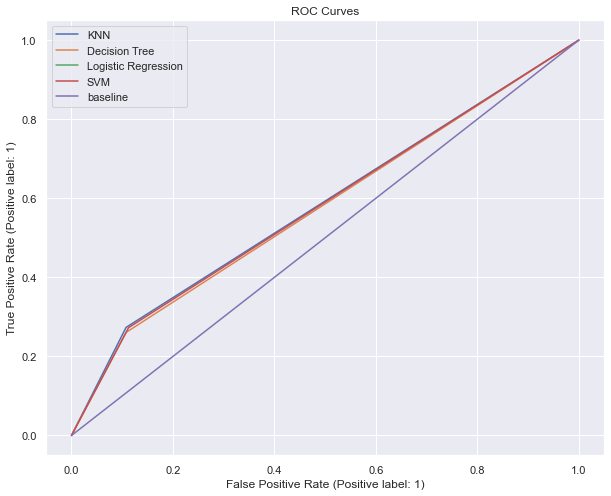

In [31]:
#Plot ROC Curves for all models
fig, ax = plt.subplots(figsize=(10,8))
RocCurveDisplay.from_predictions(knn_pipe.predict( X_test), y_test, pos_label = 1, ax = ax, label = 'KNN')
RocCurveDisplay.from_predictions(dt_pipe.predict(X_test), y_test, pos_label = 1, ax = ax, label = 'Decision Tree')
RocCurveDisplay.from_predictions(lr_pipe.predict(X_test), y_test, pos_label = 1, ax = ax, label = 'Logistic Regression')
RocCurveDisplay.from_predictions(svc_pipe.predict(X_test), y_test, pos_label = 1, ax = ax, label = 'SVM')
plt.plot(np.arange(0, 1.1, .1), np.arange(0, 1.1, .1), label = 'baseline')
plt.title('ROC Curves')
plt.legend()
plt.grid(True)

### Confusion Matrices

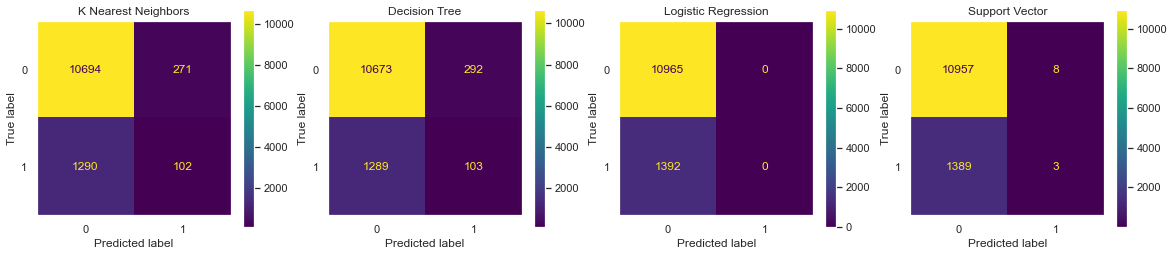

In [63]:
# plot confusion matrices
fig, ax = plt.subplots(1, 4, figsize = (20, 4))
ConfusionMatrixDisplay.from_estimator(knn_pipe, X_test, y_test, ax = ax[0])
ConfusionMatrixDisplay.from_estimator(dt_pipe, X_test, y_test, ax = ax[1])
ConfusionMatrixDisplay.from_estimator(lr_pipe, X_test, y_test, ax = ax[2])
ConfusionMatrixDisplay.from_estimator(svc_pipe, X_test, y_test, ax = ax[3])
ax[0].grid(False)
ax[1].grid(False)
ax[2].grid(False)
ax[3].grid(False)
ax[0].set_title('K Nearest Neighbors')
ax[1].set_title('Decision Tree')
ax[2].set_title('Logistic Regression')
ax[3].set_title('Support Vector')
plt.show()

### Summary

Comparing the four models with default parameters, we can see that KNN is the fastest followed by Logistic Regression and Decision Tree. The Support Vector took a really long time compared to the other three models. 
In terms of accuracy, Support Vector was the most accurate followed closely by Logistic Regression. Decision Tree had the lowest test accuracy. Comparing these to the benchmark (.88734 accuracy from the dummy classifier), only logistic regression beats the baseline.
With default parameters, we would recommend the logistic regression for this classification problem in terms of overall performance (accuracy and performance time) and for beating the benchmark ever so slightly.

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

### More Feature Engineering

Examine feature importance and see the impact of removing Education status on the logistic regression model we built earlier to help us decide whether to keep the feature or not.

In [91]:
#Drop Education
X_train2 = X_train.drop("education", axis = 1)
X_test2 = X_test.drop("education", axis = 1)

In [92]:
#Create transformer - use standard scaling
transformer2 = make_column_transformer((OneHotEncoder(drop = 'if_binary'), ['job','marital']),
                                     remainder = StandardScaler())

In [93]:
#Using logistic regression  as it was the best perfroming model so far with defaults
lr_start2 = process_time()
lr_pipe2 = Pipeline([('transform', transformer2), ('lr', LogisticRegression())])
lr_pipe2.fit(X_train2, y_train)
lr_stop2 = process_time()
lr_pipe2

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['job', 'marital'])])),
                ('lr', LogisticRegression())])

In [94]:
lr_train_acc2 = lr_pipe2.score(X_train, y_train)
lr_test_acc2 = lr_pipe2.score(X_test, y_test)
lr_predictions2 = lr_pipe2.predict(X_test)
lr_time2= lr_stop2-lr_start2

### Results
print(classification_report(lr_predictions2, y_test))

print(f'Training Accuracy : {lr_train_acc2: .2f}')
print(f'Test Accuracy     : {lr_test_acc2: .8f}')
print(f'Train Time        : {lr_time2}')

              precision    recall  f1-score   support

           0       1.00      0.89      0.94     12357
           1       0.00      0.00      0.00         0

    accuracy                           0.89     12357
   macro avg       0.50      0.44      0.47     12357
weighted avg       1.00      0.89      0.94     12357

Training Accuracy :  0.89
Test Accuracy     :  0.88735130
Train Time        : 0.625


Here, we can see that removing "education" does not change our test accuracy. Since we are limiting the data to 7 factors we will keep it for our purpose. If in the future we consider all factors, then we can decide to remove "education".

In [96]:
#Examine permutation impoertance of the factors

# score with test set
print('model accuracy :', lr_pipe.score(X_test, y_test))
# permutation importance
r = permutation_importance(lr_pipe, X_test, y_test, n_repeats = 50, random_state = 93)
print('importance:', r.importances_mean)
pd.DataFrame({"Column":X.columns, "Importance":r.importances_mean}).sort_values(
        by = "Importance", ascending = False)

model accuracy : 0.8873512988589464
importance: [ 1.61851582e-06 -1.61851582e-06 -1.94221899e-05  1.61851582e-06
  0.00000000e+00  0.00000000e+00  0.00000000e+00]


,Column,Importance
0,age,0.000002
3,education,0.000002
4,default,0.000000
5,housing,0.000000
6,loan,0.000000
1,job,-0.000002
2,marital,-0.000019


### Find Best Logistic Regression Using Grid Search CV

In [33]:
lr_params = {'lr__C': np.logspace(-3,3,7),
         'lr__penalty': ["l1","l2"]    # l1 lasso l2 ridge
         }

#### Grid Search with model using "roc_auc" scoring

In [34]:
#Grid Search with model using default scoring
lr_grid_roc = GridSearchCV(lr_pipe, param_grid = lr_params, scoring='roc_auc')
lr_grid_roc.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='if_binary'),
                                                                         ['job',
                                                                          'marital',
                                                                          'education'])])),
                                       ('lr', LogisticRegression())]),
             param_grid={'lr__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'lr__penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [35]:
lr_train_acc_g_roc = lr_grid_roc.score(X_train, y_train)
lr_test_acc_g_roc = lr_grid_roc.score(X_test, y_test)
lr_best_params_g_roc = lr_grid_roc.best_params_
lr_predictions_g_roc = lr_grid_roc.predict(X_test)

### Results
print(classification_report(lr_predictions_g_roc, y_test))

print(f'Train Accuracy: {lr_train_acc_g_roc: .2f}')
print(f'Test Accuracy    : {lr_test_acc_g_roc: .8f}')
print(f'Train Time: {np.sum(lr_grid_roc.cv_results_["mean_fit_time"])}')
print(f'Best parameters: {lr_best_params_g_roc}')

              precision    recall  f1-score   support

           0       1.00      0.89      0.94     12357
           1       0.00      0.00      0.00         0

    accuracy                           0.89     12357
   macro avg       0.50      0.44      0.47     12357
weighted avg       1.00      0.89      0.94     12357

Train Accuracy:  0.63
Test Accuracy    :  0.62881700
Train Time: 2.5587517738342287
Best parameters: {'lr__C': 0.1, 'lr__penalty': 'l2'}


#### Grid Search with model not using "roc_auc" scoring

In [36]:
lr_grid = GridSearchCV(lr_pipe, param_grid = lr_params)
lr_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='if_binary'),
                                                                         ['job',
                                                                          'marital',
                                                                          'education'])])),
                                       ('lr', LogisticRegression())]),
             param_grid={'lr__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'lr__penalty': ['l1', 'l2']})

In [37]:
lr_train_acc_g = lr_grid.score(X_train, y_train)
lr_test_acc_g = lr_grid.score(X_test, y_test)
lr_best_params_g = lr_grid.best_params_
lr_predictions_g = lr_grid.predict(X_test)

### Results
print(classification_report(lr_predictions_g, y_test))

print(f'Train Accuracy: {lr_train_acc_g: .2f}')
print(f'Test Accuracy    : {lr_test_acc_g: .8f}')
print(f'Train Time: {np.sum(lr_grid.cv_results_["mean_fit_time"])}')
print(f'Best parameters: {lr_best_params_g}')

              precision    recall  f1-score   support

           0       1.00      0.89      0.94     12357
           1       0.00      0.00      0.00         0

    accuracy                           0.89     12357
   macro avg       0.50      0.44      0.47     12357
weighted avg       1.00      0.89      0.94     12357

Train Accuracy:  0.89
Test Accuracy    :  0.88735130
Train Time: 2.2283323287963865
Best parameters: {'lr__C': 0.001, 'lr__penalty': 'l2'}


Note: We will not use the "roc_auc" scoring for all the other methods either as the data is imbalanced. The Test accuracy is better when we do not use the "roc_auc" scoring.

### Find Best KNN Classifier Using Grid Search CV

In [38]:
knn_params = {'knn__n_neighbors': range(1, 51, 2), 'knn__weights':['uniform', 'distance']} 
knn_grid = GridSearchCV(knn_pipe, param_grid = knn_params) #, scoring='roc_auc')
knn_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='if_binary'),
                                                                         ['job',
                                                                          'marital',
                                                                          'education'])])),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': range(1, 51, 2),
                         'knn__weights': ['uniform', 'distance']})

In [39]:
knn_train_acc_g = knn_grid.score(X_train, y_train)
knn_test_acc_g = knn_grid.score(X_test, y_test)
knn_best_params_g = knn_grid.best_params_
knn_predictions_g = knn_grid.predict(X_test)

### Results
print(classification_report(knn_predictions_g, y_test))

print(f'Train Accuracy: {knn_train_acc_g: .2f}')
print(f'Test Accuracy    : {knn_test_acc_g: .8f}')
print(f'Train Time: {np.sum(knn_grid.cv_results_["mean_fit_time"])}')
print(f'Best parameters: {knn_best_params_g}')

              precision    recall  f1-score   support

           0       1.00      0.89      0.94     12290
           1       0.02      0.46      0.04        67

    accuracy                           0.89     12357
   macro avg       0.51      0.68      0.49     12357
weighted avg       0.99      0.89      0.94     12357

Train Accuracy:  0.89
Test Accuracy    :  0.88694667
Train Time: 3.607543277740478
Best parameters: {'knn__n_neighbors': 47, 'knn__weights': 'uniform'}


### Find Best Decision Tree Using Grid Search CV

In [40]:
dt_params = {'dt__max_depth': [i for i in range(1, 11)],
         'dt__min_samples_split': [0.05,0.1, 0.2],
          'dt__criterion': ['gini', 'entropy'],
          'dt__min_samples_leaf': [2, 5]
         }
dt_grid = GridSearchCV(dt_pipe, param_grid = dt_params) #, scoring='roc_auc')
dt_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='if_binary'),
                                                                         ['job',
                                                                          'marital',
                                                                          'education'])])),
                                       ('dt',
                                        DecisionTreeClassifier(random_state=42))]),
             param_grid={'dt__criterion': ['gini', 'entropy'],
                         'dt__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'dt__min_samples_leaf': [2, 5],
                         'dt__min_samples_split': [0.05, 0.1, 0.2]})

In [41]:
dt_train_acc_g = dt_grid.score(X_train, y_train)
dt_test_acc_g = dt_grid.score(X_test, y_test)
dt_best_params_g = dt_grid.best_params_
dt_predictions_g = dt_grid.predict(X_test)

### Results
print(classification_report(dt_predictions_g, y_test))

print(f'Train Accuracy: {dt_train_acc_g: .2f}')
print(f'Test Accuracy    : {dt_test_acc_g: .8f}')
print(f'Train Time: {np.sum(dt_grid.cv_results_["mean_fit_time"])}')
print(f'Best parameters: {dt_best_params_g}')

              precision    recall  f1-score   support

           0       1.00      0.89      0.94     12357
           1       0.00      0.00      0.00         0

    accuracy                           0.89     12357
   macro avg       0.50      0.44      0.47     12357
weighted avg       1.00      0.89      0.94     12357

Train Accuracy:  0.89
Test Accuracy    :  0.88735130
Train Time: 12.666448211669923
Best parameters: {'dt__criterion': 'gini', 'dt__max_depth': 1, 'dt__min_samples_leaf': 2, 'dt__min_samples_split': 0.05}


### Find Best SVM Using Grid Search CV / Randomized Search CV (faster but less accurate)

Note: Can be run on faster performing machines in the future to improve the SVC model by adjusting parameters. 

##### Set parmas

In [42]:
#svc_params = [
#    {"svc__kernel": ["linear"], "svc__gamma": [0.1, 1, 10, 100, 1000]},
#    {"svc__kernel": ["poly"], "svc__degree": [2, 3], "svc__gamma": [0.1, 1, 10, 100, 1000]},
#    {"svc__kernel": ["rbf"], "svc__gamma": [0.1, 1, 10, 100, 1000]},
#]

In [43]:
#Alternative : Running with fewer parameters for better performance because of machine limitation
#svc_params = [
#    {"svc__kernel": ["linear"], "svc__gamma": [0.1, 1, 10]},
#    {"svc__kernel": ["poly"], "svc__degree": [2], "svc__gamma": [0.1, 1, 10]},
#    {"svc__kernel": ["rbf"], "svc__gamma": [0.1, 1, 10]},
#]

##### Grid Search CV

In [44]:
#svc_grid = GridSearchCV(svc_pipe, param_grid = svc_params) #, scoring='roc_auc')
#svc_grid.fit(X_train, y_train)

##### Randomized Search CV

In [45]:
#Use Randomized Search CV with fewer iterations to improve performance becasue GridSearch CV could not run and took for ever
# (ideally we'd choose n_iter of 100)

#Method 1: More defaults 
#svc_grid = RandomizedSearchCV(svc_pipe, param_distributions=svc_params)

#Alternative Method 2: More paremters selected
#svc_grid = RandomizedSearchCV(svc_pipe, param_distributions=svc_params, n_iter = 20, n_jobs = 4, cv = 3) #, scoring='roc_auc')
#svc_grid.fit(X_train, y_train)

##### SVC Grid Results

In [ ]:
#svc_train_acc_g = svc_grid.score(X_train, y_train)
#svc_test_acc_g = svc_grid.score(X_test, y_test)
#svc_best_params_g= svc_grid.best_params_
#svc_predictions_g = svc_grid.predict(X_test)

### Results
#print(classification_report(lr_predictions_g, y_test))

#print(f'Train Accuracy: {svc_train_acc_g: .2f}')
#print(f'Test Accuracy    : {svc_test_acc_g: .8f}')
#print(f'Train Time: {np.sum(svc_grid.cv_results_["mean_fit_time"])}')
#print(f'Best parameters: {svc_best_params_g}')

### Results Dataframe

In [58]:
# Results Dataframe: - Can include SVM results in future with better performing systems

results_df_g = pd.DataFrame({'KNN':pd.Series(knn_best_params_g),
                         'Decision Tree':pd.Series(dt_best_params_g),
                         'Logistic Regression':pd.Series(lr_best_params_g) #,
                         #'Support Vector':pd.Series(svc_best_params_g)
                        })

results_df_g.loc['Train Accuracy', :] =  [knn_train_acc_g, dt_train_acc_g,lr_train_acc_g] #, svc_train_acc_g]
results_df_g.loc['Test Accuracy', :] =  [knn_test_acc_g, dt_test_acc_g,lr_test_acc_g] #, svc_test_acc_g]
results_df_g.loc['Train Time', :] = [np.sum(knn_grid.cv_results_['mean_fit_time']),
                                      np.sum(dt_grid.cv_results_['mean_fit_time']),
                                      np.sum(lr_grid.cv_results_['mean_fit_time']) #,
                                      #np.sum(svc_grid.cv_results_['mean_fit_time'])]
                                  ]

results_df_g.dropna()

,KNN,Decision Tree,Logistic Regression
Train Accuracy,0.887933,0.887343,0.887343
Test Accuracy,0.886947,0.887351,0.887351
Train Time,3.607543,12.666448,2.228332


In [59]:
results_df_g #Including best parameters for each model

,KNN,Decision Tree,Logistic Regression
dt__criterion,NaN,gini,NaN
dt__max_depth,NaN,1,NaN
dt__min_samples_leaf,NaN,2,NaN
dt__min_samples_split,NaN,0.05,NaN
knn__n_neighbors,47,NaN,NaN
knn__weights,uniform,NaN,NaN
lr__C,NaN,NaN,0.001
lr__penalty,NaN,NaN,l2
Train Accuracy,0.887933,0.887343,0.887343
Test Accuracy,0.886947,0.887351,0.887351


## Compare best fit for each model

### Fit best KNN classifier

In [49]:
knn_pipe_best = Pipeline([('transform', transformer), ('knn', KNeighborsClassifier(n_neighbors=47, weights = 'uniform'))])

In [50]:
knn_pipe_best.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['job', 'marital',
                                                   'education'])])),
                ('knn', KNeighborsClassifier(n_neighbors=47))])

### Fit best Decision Tree

In [51]:
dtree_pipe_best = Pipeline([('transform', transformer), ('knn', DecisionTreeClassifier(random_state=42, criterion = 'gini',
                                                                                      max_depth = 1, min_samples_leaf =2,
                                                                                      min_samples_split = 0.05))])

In [52]:
dtree_pipe_best.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['job', 'marital',
                                                   'education'])])),
                ('knn',
                 DecisionTreeClassifier(max_depth=1, min_samples_leaf=2,
                                        min_samples_split=0.05,
                                        random_state=42))])

### Fit best Logistic Regression

In [53]:
lr_pipe_best = Pipeline([('transform', transformer), ('lr', LogisticRegression( C= 0.001, penalty = 'l2'))])

In [54]:
lr_pipe_best.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['job', 'marital',
                                                   'education'])])),
                ('lr', LogisticRegression(C=0.001))])

### Fit best Support Vector (SVM)

In [ ]:
#svc_pipe_best = Pipeline([('transform', transformer), ('svc', SVC(gamma=0.1, kernel='rbf'))])

In [ ]:
#svc_pipe_best.fit(X_train, y_train)

## Plot Precision-Recall Curves

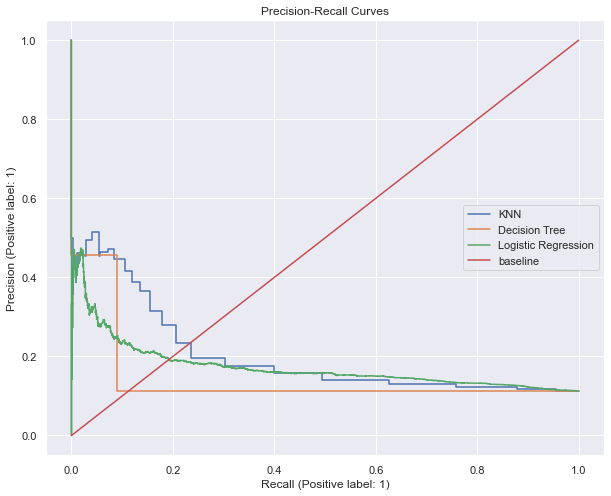

In [55]:
#Plot ROC Curves for all models
fig, ax = plt.subplots(figsize=(10,8))
PrecisionRecallDisplay.from_estimator(knn_pipe_best, X_test, y_test, pos_label = 1, ax = ax, label = 'KNN')
PrecisionRecallDisplay.from_estimator(dtree_pipe_best, X_test, y_test, pos_label = 1, ax = ax, label = 'Decision Tree')
PrecisionRecallDisplay.from_estimator(lr_pipe_best, X_test, y_test, pos_label = 1, ax = ax, label = 'Logistic Regression')
#PrecisionRecallDisplay.from_estimator(svc_pipe_best, X_test, y_test, pos_label = 1, ax = ax, label = 'SVM')
plt.plot(np.arange(0, 1.1, .1), np.arange(0, 1.1, .1), label = 'baseline')
plt.title('Precision-Recall Curves')
plt.legend()
plt.grid(True)

## Plot ROC Curves

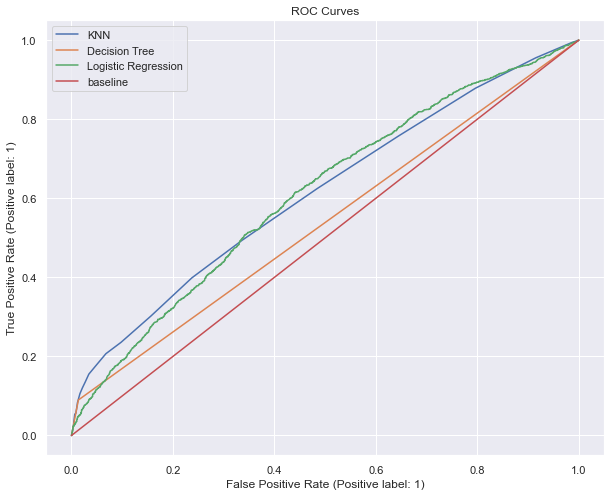

In [56]:
#Plot ROC Curves for all models
fig, ax = plt.subplots(figsize=(10,8))
RocCurveDisplay.from_estimator(knn_pipe_best, X_test, y_test, pos_label = 1, ax = ax, label = 'KNN')
RocCurveDisplay.from_estimator(dtree_pipe_best, X_test, y_test, pos_label = 1, ax = ax, label = 'Decision Tree')
RocCurveDisplay.from_estimator(lr_pipe_best, X_test, y_test, pos_label = 1, ax = ax, label = 'Logistic Regression')
#RocCurveDisplay.from_estimator(svc_pipe_best, X_test, y_test, pos_label = 1, ax = ax, label = 'SVM')
plt.plot(np.arange(0, 1.1, .1), np.arange(0, 1.1, .1), label = 'baseline')
plt.title('ROC Curves')
plt.legend()
plt.grid(True)

## Confusion Matrices

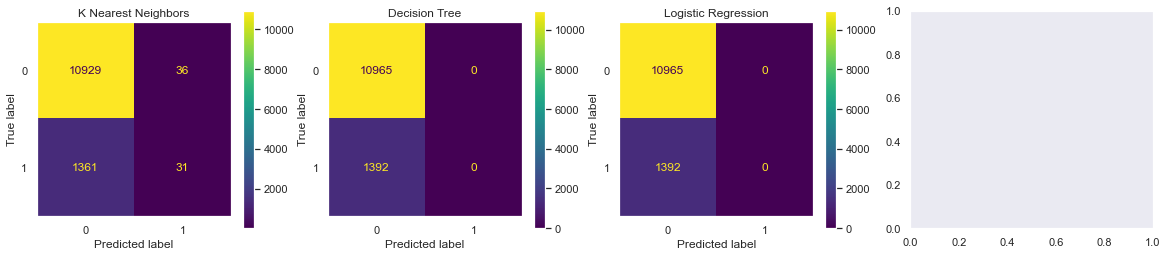

In [57]:
# plot confusion matrices
fig, ax = plt.subplots(1, 4, figsize = (20, 4))
ConfusionMatrixDisplay.from_estimator(knn_pipe_best, X_test, y_test, ax = ax[0])
ConfusionMatrixDisplay.from_estimator(dtree_pipe_best, X_test, y_test, ax = ax[1])
ConfusionMatrixDisplay.from_estimator(lr_pipe_best, X_test, y_test, ax = ax[2])
#ConfusionMatrixDisplay.from_estimator(svc_pipe_best, X_test, y_test, ax = ax[3])
ax[0].grid(False)
ax[1].grid(False)
ax[2].grid(False)
ax[3].grid(False)
ax[0].set_title('K Nearest Neighbors')
ax[1].set_title('Decision Tree')
ax[2].set_title('Logistic Regression')
#ax[3].set_title('Support Vector')
plt.show()

## Conclusion

In [61]:
#Results with defaults
results_df

,Train Time,Train Accuracy,Test Accuracy
Model,,,
Decision Tree,0.984375,0.909889,0.872056
KNN,0.109375,0.886615,0.873675
Logistic Regression,0.437500,0.887343,0.887351
Support Vector,71.187500,0.887864,0.886947


In [62]:
#Results after Grid Search
results_df_g.dropna()

,KNN,Decision Tree,Logistic Regression
Train Accuracy,0.887933,0.887343,0.887343
Test Accuracy,0.886947,0.887351,0.887351
Train Time,3.607543,12.666448,2.228332


As we can see from the results from the Grid Search, the logistic regression is the best model for this classification in terms of accuracy and time. The accuracy of both the Decision Tree and KNN Classifier improves with Grid Search tuning. In fact Decision Tree has the same accuracy as the Logistic Regression. However, it takes much longer to run. The test accuracy of the KNN classifier went up from .8736 to .8869 too. it's only slightly behind the other two. 
The logisitc regression model with the defaults also performed just as well in terms of accuracy and given its simplicity I would recommend that model with a test accuracy of .887351 overall.

## Further Recommendations

In the future, I would recommend also running Grid Search CV or Randomized Search CV for the SVM model on a more performance capable device/ server.Also, we limited the data to only include the first 7 factors while creating these models. In the future, we could try to examine models that consider all factors available. We can use factor importance to pick the most important factors from them.

##### Questions